In [1]:
from tesswcs import WCS
import numpy as np
import matplotlib.pyplot as plt

# We will need to use astropy units for plotting
import astropy.units as u
# The `footprint` function is a convenience function to obtain the edges of the CCD
from tesswcs.utils import footprint
from tesswcs import pointings

In [2]:
def main():
    from datetime import date
    from datetime import datetime
    import pandas as pd

    fn_ = 'https://tess.mit.edu/public/files/TESS_orbit_times.csv'
    df = pd.read_csv(fn_, header = 0, delimiter=",", engine='python', na_filter=True).values
    sector = df[0:-1,0]
    orbit = df[0:-1,1]
    start_sector = df[0:-1,2]
    end_sector = df[0:-1,3]

    today = str(date.today())
    today_split = datetime.strptime(today, "%Y-%m-%d")
    today_decimal = today_split.year + (today_split.timetuple().tm_yday - 1) / 365.2526
    
    for ii in zip(start_sector, end_sector, sector, orbit):     
        start_date = datetime.strptime(str(ii[0][0:10]), "%Y-%m-%d")
        end_date = datetime.strptime(str(ii[1][0:10]), "%Y-%m-%d")
        
        start_date_decimal = start_date.year + (start_date.timetuple().tm_yday - 1) / 365.2526
        end_date_decimal = end_date.year + (end_date.timetuple().tm_yday - 1) / 365.2526

        if (today_decimal >= start_date_decimal) & (today_decimal <= end_date_decimal):
            print('Sector', ii[2], 'in Orbit', int(ii[3]))
            return int(ii[2]), int(ii[3])

if __name__ == "__main__":
    sector_, orbit_ = main()

Sector 73 in Orbit 153


In [ ]:
# Boresight RA, Dec, and Roll
ra, dec, roll = np.asarray(pointings[pointings['Sector'] == sector_][['RA', 'Dec', 'Roll']])[0]
wcs = WCS.predict(ra, dec, roll, camera=1, ccd=1)

In [6]:
# We will also create an ecliptic plane vector for plotting purposes
from astropy.coordinates import SkyCoord
ecliptic_plane = SkyCoord(np.arange(0, 360, 1), np.arange(0, 360, 1)*0, unit='deg', frame='geocentricmeanecliptic').transform_to('icrs')
ra, dec, roll = np.asarray(pointings[pointings['Sector'] == sector_][['RA', 'Dec', 'Roll']])[0]

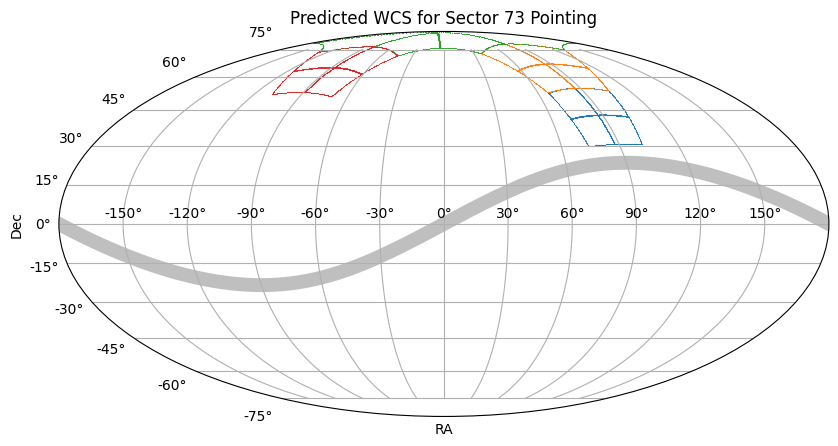

In [7]:
# Set up plot parameters
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(True)
ax.set(
    title=f"Predicted WCS for Sector {sector_} Pointing",#RA: {ra}, Dec: {dec}, Roll: {roll}\n[i.e. Sector {sector} Pointing]",
    xlabel="RA",
    ylabel="Dec",
)
# Plot the ecliptic plane
s = np.argsort(ecliptic_plane.ra.wrap_at(180 * u.deg).rad)
plt.plot(ecliptic_plane.ra.wrap_at(180 * u.deg).rad[s], ecliptic_plane.dec.rad[s], color='grey', zorder=-10, alpha=0.5, lw=10)

# iterate over camera, CCD
for camera in np.arange(1, 5):
    for ccd in np.arange(1, 5):
        # predict the WCS
        wcs = WCS.predict(ra, dec, roll, camera=camera, ccd=ccd)
        # create world coordinates from a pixel footprint
        c = wcs.pixel_to_world(*footprint().T)

        # Plot each camera/CCD
        ax.scatter(
            c.ra.wrap_at(180 * u.deg).rad,
            c.dec.rad,
            lw=0.5,
            s=0.1,
            c=f"C{camera - 1}",
        )



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

# Generate random data for demonstration (100 random stars)
np.random.seed(0)
ra = np.random.uniform(0, 360, 100) * u.degree
dec = np.random.uniform(-90, 90, 100) * u.degree

# Convert to SkyCoord object in equatorial coordinates
sky_coords = SkyCoord(ra, dec, frame='icrs')

# Convert to ecliptic coordinates
ecliptic_lon = sky_coords.barycentrictrueecliptic.lon.wrap_at(180 * u.deg).radian
ecliptic_lat = sky_coords.barycentrictrueecliptic.lat.radian

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(111, projection="mollweide")
plt.scatter(ecliptic_lon, ecliptic_lat, s=10, color='blue', alpha=0.5)
plt.grid(True)
plt.title("Sky in Ecliptic Coordinates")
plt.xlabel("Ecliptic Longitude")
plt.ylabel("Ecliptic Latitude")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

# Generate random data for demonstration (100 random stars)
np.random.seed(0)
ra = np.random.uniform(0, 360, 100) * u.degree  # Right Ascension
dec = np.random.uniform(-90, 90, 100) * u.degree # Declination

# Convert RA for proper plotting
ra = ra.wrap_at(180 * u.deg).radian
dec = dec.radian

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(111, projection="mollweide")
plt.scatter(ra, dec, s=10, color='blue', alpha=0.5)
plt.grid(True)
plt.title("Sky in Equatorial Coordinates")
plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.show()